run with sage

# Prerequisites

- Elliptic curves
- Elliptic curves over finite fields

# Resources
- https://www.youtube.com/watch?v=A2KNrgiWquU&list=PLYpVTXjEi1oe1OeAllJpNhFoI4B7Ws8Yl enjoy this playlist

# Theory

Here we will explore more concepts about elliptic curves

## Torsion points

https://crypto.stanford.edu/pbc/notes/elliptic/torsion.html

Let $E$ be an elliptic curve defined over a field $K$. Let $n$ be a positive integer. We are interested in the group $$E[n]= \{P∈E\ |\ nP=\mathcal{O}\}$$
- A point satisfying $nP = \mathcal{O}$ is called a **point of order $n$**
- If we want the coordinates of $P$ to lie in a particular field $K$ we write $P \in E(K)[n]$

In [1]:
K = GF(13)
E = EllipticCurve(K, [1, 0])
n = 2
En_points = E(0).division_points(n) # E(0) is the point at infinity
print(En_points)

print([n * P == E(0) for P in En_points]) # check all points 


[(0 : 0 : 1), (0 : 1 : 0), (5 : 0 : 1), (8 : 0 : 1)]
[True, True, True, True]


**Theorem**

Let $E$ be an elliptic curve over a field $K$ and let $n$ be a positive integer. If the characteristic of $K$ **does not divide** $n$, or is $0$, then 
- $E(K)[n] \simeq \mathbb{Z}/n\mathbb{Z} \times \mathbb{Z}/n\mathbb{Z}$ 




Let $E(K)$ be an elliptic curve and $l$ an integer.  
If $char(K) = p > 0$ factor $l =  m \cdot p^r, \ m \notin p\mathbb Z$ otherwise $m=l$. Then
$$E[l] \simeq \mathbb Z / m \times \mathbb Z / l \ \ \ or \ \ \ E[l] \simeq 
\mathbb Z / m \times \mathbb Z / m$$

In $\mathbb C$ the $l$-torsion subgroups are in most cases a torus over $\mathbb{Z} / l$

**Mordell-Weil theorem**
> Let $K$ be a number field. Then $E(K)$ is finitely generated abelian group

## Point counting

We denote $\#E(\mathbb{F}_q) = |E(\mathbb {F}_q)|$ = number of points on the elliptic curve.

**Hasse's Theorem**
$$\#E(\mathbb{F}_q) =q+1-t \  \text{where} \  |t| \leq2 \sqrt q$$

$t = q+1 - \#E(\mathbb{F}_q)$ is called the **trace of frobenius** of the curve

This just gives an upper bound but there is a specific algorithm which counts points in time poly in $log(q)$

In [371]:
q = 101
E = EllipticCurve(GF(q), [1, -1])
print(E.cardinality()) # number of points on the curve
print(bool(E.trace_of_frobenius() < 2 * sqrt(q))) # check inequality
print(E.trace_of_frobenius(), q + 1 - E.cardinality() ) # Trace of frobenius

105
True
-3 -3


### Supersingular and ordinary curves
> Let $E$ be an elliptic curve over a field $\mathbb{F}_p$ with characteristic $p$. Then: 
> - if $E[p] \simeq \mathbb{Z}/p\mathbb{Z} \Rightarrow E$ is called **ordinary**
> - If $E[p] \simeq \{\mathcal{O}\} \Rightarrow E$  is called **supersingular**

Also
> Let $E$ be an elliptic curve over a field $\mathbb{F}_q$ with $q = p^r$. $E$ is **supersingular** $\iff p$ divides $q + 1 - \#E(\mathbb{F}_q)$   

This case can be simplified to $q = p, \ p>5 \Rightarrow \#E(\mathbb{F}_q) = p +1$


**Remark**
- If $E[n]$ is generated by taking linear combinations of 2 points $(P, Q)$:
$$E[n] = \langle P, Q \rangle = \{aP + bQ \ : \ a, b, \in \mathbb{Z}/ n\mathbb{Z}\}$$

### Curves over $\mathbb Q$

In [336]:
E = EllipticCurve([1, 2])
print(E)

Elliptic Curve defined by y^2 = x^3 + x + 2 over Rational Field


In [337]:
m = E.torsion_order()
Em_points = E.torsion_points()
print(m, Em_points)

4 [(-1 : 0 : 1), (0 : 1 : 0), (1 : -2 : 1), (1 : 2 : 1)]


In [338]:
for p in Em_points:
    print(p * m)

(0 : 1 : 0)
(0 : 1 : 0)
(0 : 1 : 0)
(0 : 1 : 0)


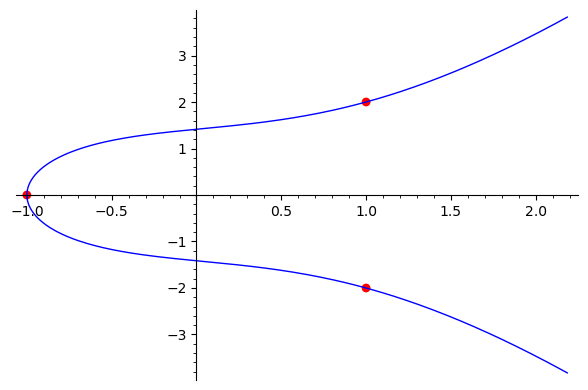

In [339]:
g = Graphics()
g += E.plot()
for p in Em_points:
    if p !=E(0, 1, 0):
        g+=p.plot(color = 'red', pointsize = 40)
g

### Curves over $\mathbb{F}_p$ 


In [361]:
# Let
q = 13^2 # q = 13^r for ordinary curve
k.<a> = GF(q)
p = k.characteristic()
E = EllipticCurve(k,[1,0])
print(E)

Elliptic Curve defined by y^2 = x^3 + x over Finite Field in a of size 13^2


In [362]:
print(E.cardinality())

print((q + 1  - E.cardinality()) % p == 0) # True if it's supersingular
# print(E.trace_of_frobenius() % p) # same as above
print(E.is_supersingular())

160
False
False


In [363]:
O = E(0) # point at infinity
#?O.division_points

In [364]:
O.division_points(p)

[(0 : 1 : 0)]

## The J invariant

**$j$-invariant**
> Labels an isomorphism class of elliptic curves. Two elliptic curves are isomorphic over the algebraic closure $\bar k \iff$  they have the same $j$-invariant

$$ j = 1728 \cdot \dfrac {4a^3}  {4a^3 + 27b^2}$$

If given the $j$-invariant we can recover the elliptic curve as follows:
$$E:y^2=x^3-3j(j-1728)x-2j(j-1728)^2$$

In [84]:
E = EllipticCurve([1, -1])
print(E)
print(E.j_invariant())

Elliptic Curve defined by y^2 = x^3 + x - 1 over Rational Field
6912/31


In [85]:
EllipticCurve_from_j(6912/31)

Elliptic Curve defined by y^2 = x^3 + x - 1 over Rational Field